In [1]:
# Importing dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Reading and splitting data

In [2]:
'''
    Reading and dividing the data
'''
# Read CSV files
train_data = pd.read_csv("./OccupancyTrain.csv", header=None)
test_data = pd.read_csv("./OccupancyTest.csv", header=None)
# Investigating data
print(train_data.head())
print(test_data.head())

# Divide into train and test
x_train = train_data.iloc[:,:-1].values
y_train = train_data.iloc[:,-1].values
x_test = test_data.iloc[:,:-1].values
y_test = test_data.iloc[:,-1].values

# Combined data
df_combined = pd.concat([train_data, test_data])
print(df_combined.shape)
print(train_data.shape)
print(test_data.shape)
print(len(df_combined[df_combined.iloc[:,-1]==1.0]))
print(len(df_combined[df_combined.iloc[:,-1]==0.0]))

       0     1       2        3         4    5
0  21.29  21.1    0.00   592.50  0.003297  0.0
1  22.10  26.6  464.00  1073.25  0.004375  1.0
2  19.39  27.2    0.00   463.00  0.003783  0.0
3  20.60  19.5    0.00   435.00  0.002919  0.0
4  21.50  33.5  475.25  1281.50  0.005320  1.0
       0          1       2            3         4    5
0  23.10  29.700000  466.50  1224.666667  0.005198  1.0
1  19.79  36.200000   24.00   507.500000  0.005172  0.0
2  20.39  32.290000    0.00   684.000000  0.004785  0.0
3  21.50  32.090000  440.25   619.000000  0.005094  1.0
4  21.29  26.683333  454.00   895.166667  0.004176  1.0
(1000, 6)
(600, 6)
(400, 6)
500
500


# Exercise 1
## Visualization / 10 points

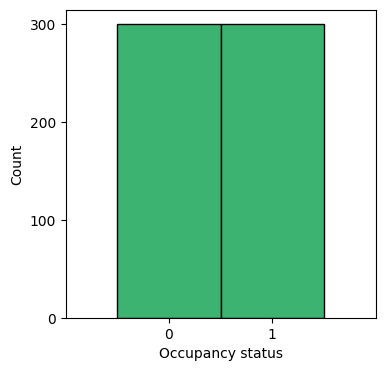

In [3]:
# Distribution
# Defining plot variables
df_combined_lc = train_data.iloc[:,-1] 
unique_values = df_combined_lc.unique()
bins = [unique_values[0] - .5, (unique_values[0] + unique_values[1]) / 2, unique_values[1] + .5]

# Defining plot
plt.figure(figsize=(4, 4))
plt.hist(df_combined_lc,bins=bins, ec="black", color="mediumseagreen")

# Plot post-processing
plt.xlabel("Occupancy status")
plt.ylabel("Count")
# plt.title("Distribution: Occupancy status")
plt.xticks(unique_values)
plt.yticks(np.arange(0, 600, step=100))
plt.margins(x=.25, y=.05)

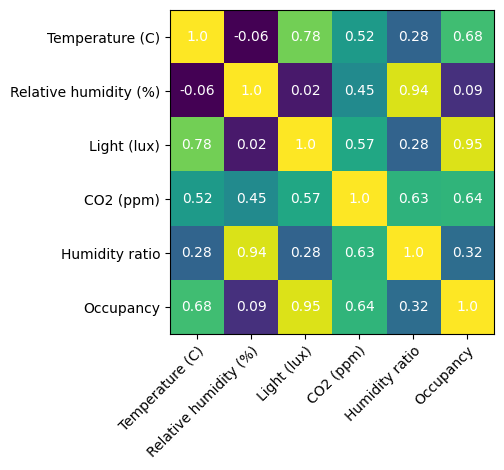

In [4]:
# Correlation
# Headers (From assignment description)
headers = ["Temperature (C)", "Relative humidity (%)", "Light (lux)", "CO2 (ppm)", "Humidity ratio", "Occupancy"]

# Finding correlation
corr = df_combined.corr(method="pearson")

# Showing heatmap
fig, ax = plt.subplots()
im = ax.imshow(corr)

# Setting ticks
plt.xticks(ticks=np.arange(len(headers)), labels=headers)
plt.yticks(ticks=np.arange(len(headers)), labels=headers)

# Rotating ticks
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", 
         rotation_mode="anchor")

# Annotating plot
for i in range(len(headers)):
    for j in range(len(headers)):
        ax.text(j, i, round(corr.iloc[i, j], 2), ha="center", va="center", color="w")

# Customize the plot
fig.tight_layout()

# Exercise 2
## 1-NearestNeighbor / 10 points

In [395]:
# '''
# PROCEDURE
#     Define the data
#     Set k
#     Compare new point to all other points
#     Find ArgMin, set label to argmin from x_TEST
# '''
# # Function for calculating the euclidean distance
# def euclidean_distance(p, q): 
#     dist = np.sqrt(np.sum((np.array(p) - np.array(q))**2))
#     return dist

# # Function for handling knn
# def knn(new_data, k=1):
#     # List holding predictions
#     predictions = []
#     # Looping through new data
#     for data in new_data:
#         # Calculating distances
#         distances = [euclidean_distance(p, data) for p in x_train]
#         argMinIdxs = []

#         # Find k min occurrences
#         while len(argMinIdxs) < k: 
#             argMinIdxs.append(np.argmin(distances))
#             del distances[np.argmin(distances)]
        
#         # Find and count the labels
#         labels = [y_train[idx] for idx in argMinIdxs]
#         label_counts = {}
#         for label in labels:
#             if label in label_counts:
#                 label_counts[label] += 1
#             else:
#                 label_counts[label] = 1
                
#         max_label = max(label_counts, key=label_counts.get)
#         predictions.append(max_label)
#     return predictions


In [5]:
'''
CLASS TECHNIQUE
'''
# Defining class
class kNearest:
    # Initialising class
    def __init__(self, k=1):
        self.k = k
        self.X = None
        self.y = None

    # Euclidean distance
    def euclidean_distance(self, model_data, new_data): 
        dist = np.sqrt(np.sum((np.array(model_data) - np.array(new_data))**2))
        return dist

    # Fitting with data
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    # Predicting labels for new data
    def predict(self, new_data):
        y_preds = []
        for data in new_data:
            # Calculate distance to all data
            dists = [self.euclidean_distance(xt_data, data) for xt_data in self.X]

            # Find k smallest indexes
            argMinIdxs = np.argsort(dists)[:self.k]

            # Find and count the labels
            labels = [self.y[idx] for idx in argMinIdxs]
            # Calculate frequenceis for each value
            label_counts = np.bincount(labels)
            # Find max label
            max_label = np.where(label_counts == np.max(label_counts))[0]
            # Append to predicted values
            y_preds.append(max_label)
        return y_preds
            

In [6]:
# Training model
knn = kNearest(k=1)
knn.fit(X=x_train, y=y_train)

In [7]:
'''
DETERMINE ACCURACY
'''
from sklearn.metrics import accuracy_score

pred_train = knn.predict(x_train)
acc_train = accuracy_score(y_train, pred_train)

pred_test = knn.predict(x_test)
acc_test = accuracy_score(y_test, pred_test)

print(f"Accuracy train\t: {acc_train}\nAccuracy test\t: {acc_test}")


Accuracy train	: 1.0
Accuracy test	: 0.9775


In [131]:
# # Scikit-learn comparision
# from sklearn.neighbors import KNeighborsClassifier
# kneigh = KNeighborsClassifier(n_neighbors=5)
# kneigh.fit(X=x_train, y=y_train)
# y_pred_train = kneigh.predict(X=x_train)
# y_pred_test = kneigh.predict(X=x_test)
# train_acc = accuracy_score(y_train, y_pred_train)
# test_acc = accuracy_score(y_test, y_pred_test)
# print(f"Accuracy train\t: {train_acc}\nAccuracy test\t: {test_acc}")

Accuracy train	: 0.9916666666666667
Accuracy test	: 0.9675


# Exercise 3
## Cross-validation / 10 points

In [8]:
# Importing KFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Ks and accuracy scores
ks = [1,3,5,7,9,11]
accuracy_scores = []

# Create kfold cross validation
cv = KFold(n_splits=5)
for k in ks:
    accs = []
    for train, test in cv.split(x_train):
        X_train_cv, y_train_cv, X_test_cv, y_test_cv = x_train[train], y_train[train], x_train[test], y_train[test]
        # creating model
        kneigh = kNearest(k=k)
        kneigh.fit(X_train_cv, y_train_cv)
        pred = kneigh.predict(X_test_cv)
        accs.append(accuracy_score(y_test_cv, pred))
    k_avg = np.mean(accs)
    accuracy_scores.append(k_avg)
print(accuracy_scores)


[0.9816666666666667, 0.9916666666666668, 0.9916666666666668, 0.9916666666666668, 0.9916666666666668, 0.99]


In [9]:
maxk = ks[np.argmax(accuracy_scores)]
print(f"Best k value: {maxk}")

Best k value: 3


In [149]:
# '''
#     Scikit-learn comparison
# '''
# # Importing KFold
# from sklearn.model_selection import KFold
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Ks and accuracy scores
# ks = [1,3,5,7,9,11]
# accuracy_scores = []

# # Create kfold cross validation
# cv = KFold(n_splits=5)
# for k in ks:
#     k_avg_acc = []
#     for train, test in cv.split(x_train):
#         X_train_cv, y_train_cv, X_test_cv, y_test_cv = x_train[train], y_train[train], x_train[test], y_train[test]
#         # creating model
#         kneigh = KNeighborsClassifier(n_neighbors=k)
#         kneigh.fit(X_train_cv, y_train_cv)
#         pred = kneigh.predict(X_test_cv)
#         k_avg_acc.append(accuracy_score(y_test_cv, pred))
#     k_avg = np.mean(k_avg_acc)
#     accuracy_scores.append(k_avg)
# print(accuracy_scores)

# Exercise 4
## k_best model / 10 points

In [11]:
# Initialising and fitting model
knn_best = kNearest(k=maxk)
knn_best.fit(X=x_train, y=y_train)

# Predicting train set accuracy
knn_best_train_pred = knn_best.predict(new_data=x_train)
knn_best_acc_train = accuracy_score(y_true=y_train, y_pred=knn_best_train_pred)

# Predicting test set accuracy
knn_best_test_pred = knn_best.predict(new_data=x_test)
knn_best_acc_test = accuracy_score(y_true=y_test, y_pred=knn_best_test_pred)

# Printing out the results
print(f"Accuracy k_best train\t: {knn_best_acc_train}\nAccuracy k_best test\t: {knn_best_acc_test}")

Accuracy k_best train	: 0.9933333333333333
Accuracy k_best test	: 0.9875


In [13]:
# # Scikit-learn comparision
# from sklearn.neighbors import KNeighborsClassifier
# kneigh = KNeighborsClassifier(n_neighbors=3)
# kneigh.fit(X=x_train, y=y_train)
# y_pred_train = kneigh.predict(X=x_train)
# y_pred_test = kneigh.predict(X=x_test)
# train_acc = accuracy_score(y_train, y_pred_train)
# test_acc = accuracy_score(y_test, y_pred_test)
# print(f"Accuracy train\t: {train_acc}\nAccuracy test\t: {test_acc}")